### Load the needed libraries

In [26]:
#%% load the libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

### Read the data and print the top fields

In [27]:
#url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
data = pd.read_csv(url,error_bad_lines=False)
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


### Clean up the data by putting the country as the province when its empty

In [28]:
chinaTag = 'China'
data['Province/State'][pd.isna(data['Province/State'][:])] = data['Country/Region']
data['Province/State'][data['Country/Region'] == chinaTag] = data['Country/Region'][data['Country/Region'] == chinaTag]

group states toghether

In [29]:
groupBy = 'Province/State'
grpedData = data.groupby([groupBy],as_index=False).sum()
grpedData.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,"Adams, IN",39.8522,-77.2865,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1,1,1,4,4,5,7,7,7,11
2,Alabama,32.3182,-86.9023,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,6
3,"Alachua, FL",29.7938,-82.4944,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Alameda County, CA",37.6017,-121.7195,0,0,0,0,0,0,0,...,1,1,2,2,2,0,0,0,0,0


Two function to plot the updated daily cases and daily increase in cases

In [30]:
def plot_daily_cases(data,listOfCountries,minOutbreakThresh=30,groupBy='Province/State'):
    colNames = data.columns[4:]
    for state in listOfCountries:
        countryTbl = data[data[groupBy] == state][colNames]
        dailyCases = countryTbl.values[countryTbl>minOutbreakThresh]
        plt.plot(range(0,dailyCases.size),dailyCases.squeeze())
    plt.grid()
    plt.xlabel('Days')
    plt.ylabel('Daily cases')
    plt.legend(listOfCountries,bbox_to_anchor=(1.5, 1.05))
def plot_daily_increases(data,listOfCountries,minOutbreakThresh=30,groupBy='Province/State'):
    colNames = data.columns[4:]
    maxTh = 5000
    for state in listOfCountries:
        countryTbl = data[data[groupBy] == state][colNames]
        countryTbl = countryTbl.values[countryTbl>minOutbreakThresh]
        inc = countryTbl[1:] - countryTbl[0:-1]
        inc[inc>maxTh] = maxTh
        plt.plot(range(0,inc.size),inc.squeeze())
    plt.grid()
    plt.xlabel('Days')
    plt.ylabel('Daily increase')
    plt.legend(listOfCountries,bbox_to_anchor=(1.5, 1.05))
def plot_daily_growth_factor(data,listOfCountries,minOutbreakThresh=10,groupBy='Province/State'):
    colNames = data.columns[4:]
    for state in listOfCountries:
        countryTbl = data[data[groupBy] == state][colNames]
        countryTbl = countryTbl.values[countryTbl>minOutbreakThresh]
        inc = countryTbl[1:] - countryTbl[0:-1]
        gf = inc[1:]/inc[0:-1]
        gf[gf==np.nan] = 0
        gf[gf>=4] = 4
        plt.plot(range(0,gf.size),gf.squeeze())
    plt.grid()
    plt.xlabel('Days')
    plt.ylabel('Daily increase')
    plt.legend(listOfCountries,bbox_to_anchor=(1.5, 1.05))

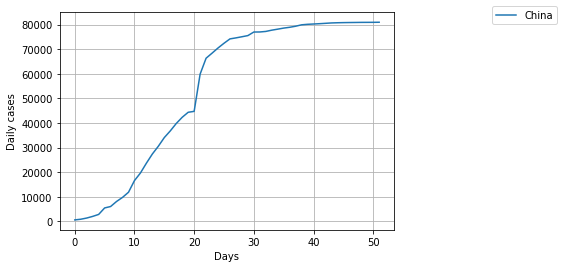

In [31]:
plot_daily_cases(grpedData,np.array([chinaTag]),groupBy=groupBy)

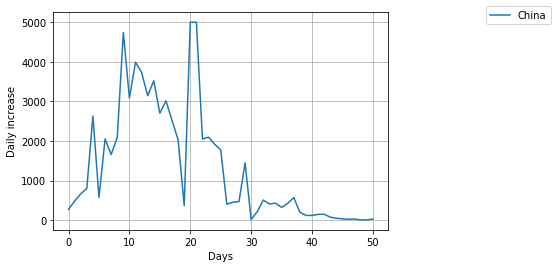

In [32]:
plot_daily_increases(grpedData,np.array([chinaTag]),groupBy=groupBy)

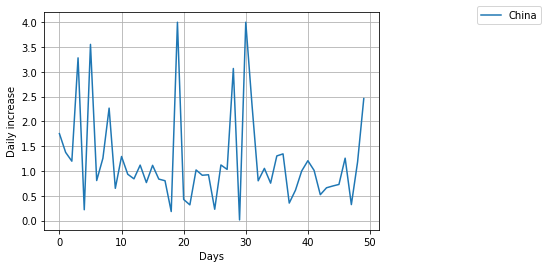

In [33]:
plot_daily_growth_factor(grpedData,np.array([chinaTag]),groupBy=groupBy)

### Get list of countries that have the covid-19 outbreak

Define outbreak as more 2000 cases

In [34]:
breakOutTh =2000
exludedList = [chinaTag,'Others','Diamond Princess']
col_names = grpedData.columns
list_of_countries = grpedData[groupBy][grpedData[col_names[-1]]>breakOutTh].values
# %% treat china separately
remInd = []
for i,x in enumerate(list_of_countries):
    if x in exludedList:
        remInd.append(i)
list_of_countries = np.delete(list_of_countries,remInd)
print(list_of_countries)

['France' 'Germany' 'Iran' 'Italy' 'Korea, South' 'Spain']


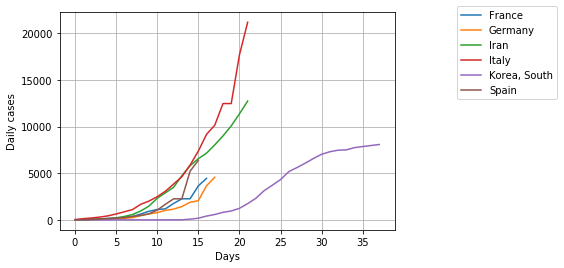

In [35]:
plot_daily_cases(grpedData,list_of_countries,groupBy=groupBy,minOutbreakThresh=20)

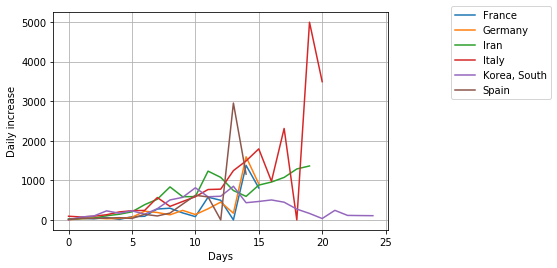

In [36]:
plot_daily_increases(grpedData,list_of_countries,groupBy=groupBy,minOutbreakThresh=30)

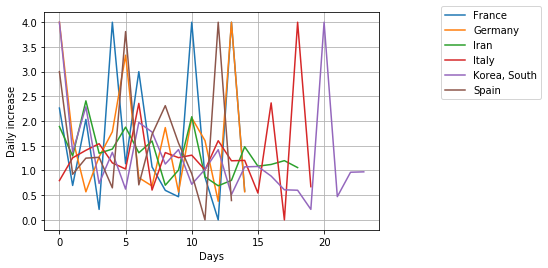

In [37]:
plot_daily_growth_factor(grpedData,list_of_countries,groupBy=groupBy,minOutbreakThresh=30)

### Get countries at risk of outbreak
define as countries between 1000 to 2000 cases

In [38]:
breakOutRiskTh =1000
col_names = grpedData.columns
list_of_countries = grpedData[groupBy][(grpedData[col_names[-1]]>breakOutRiskTh) & (grpedData[col_names[-1]]<breakOutTh)].values
# %% treat china separately
remInd = []
for i,x in enumerate(list_of_countries):
    if x in exludedList:
        remInd.append(i)
list_of_countries = np.delete(list_of_countries,remInd)
print(list_of_countries)

['Norway' 'Switzerland' 'United Kingdom']


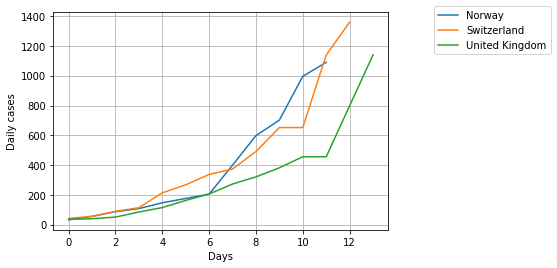

In [39]:
plot_daily_cases(grpedData,list_of_countries,groupBy=groupBy)

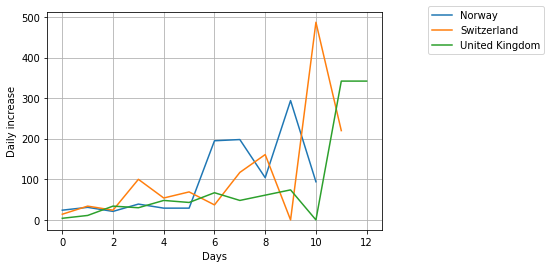

In [40]:
plot_daily_increases(grpedData,list_of_countries,groupBy=groupBy)

Plot for a specific country of your interest

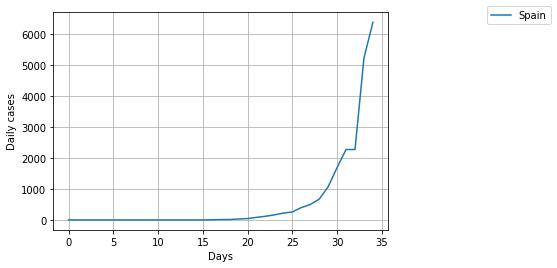

In [41]:
selectedCountry = 'Spain'
plot_daily_cases(grpedData,np.array([selectedCountry]),1,groupBy=groupBy)

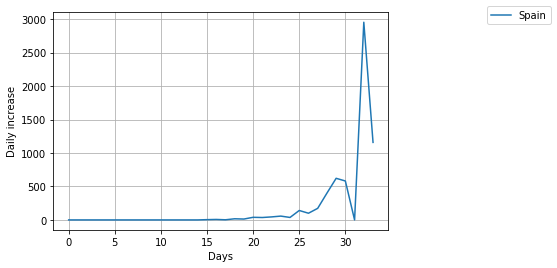

In [42]:
plot_daily_increases(grpedData,np.array([selectedCountry]),1,groupBy=groupBy)

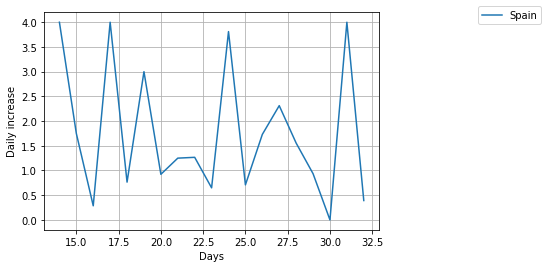

In [43]:
plot_daily_growth_factor(grpedData,np.array([selectedCountry]),1,groupBy=groupBy)